# MNIST classification using multi-layer perceptron

#### 1. Import packages

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from tqdm.notebook import trange, tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
from MLP import *

#### 2. Prepare dataset

Choose device

In [2]:
device = get_default_device()

Constants

In [3]:
batchSize = 100
datasetDir = "./datasets"

Get data

In [4]:
trainData = datasets.MNIST(root=datasetDir, train=True, transform=transforms.ToTensor(), download=True)
testData = datasets.MNIST(root=datasetDir, train=False, transform=transforms.ToTensor(), download=True)
trainSet, valSet = random_split(trainData, [50000, 10000]) # Create validation set

Data loaders

In [5]:
trainLoader = DataLoader(trainSet, batch_size=batchSize, shuffle=True, num_workers=4, pin_memory=True)
valLoader = DataLoader(valSet, batch_size=batchSize, shuffle=False, num_workers=4, pin_memory=True)
testLoader = DataLoader(testData, batch_size=batchSize, shuffle=False, num_workers=4, pin_memory=True)

trainLoader = DeviceDataLoader(trainLoader, device)
valLoader = DeviceDataLoader(valLoader, device)
testLoader = DeviceDataLoader(testLoader, device)

#### 3. Train model

Initialize model

In [6]:
model = MNIST_MLP(28*28, 32, 10)
to_device(model, device)

MNIST_MLP(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Constants

In [7]:
numEpochs = 20
learningRate = 0.001

Initial accuracy

In [8]:
epochAccuracy = [evaluate(model, valLoader)]

Train model

In [9]:
epochAccuracy += fit(numEpochs, learningRate, model, trainLoader, valLoader)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [0], val_loss: 2.2245, val_acc: 0.3039


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1], val_loss: 2.1225, val_acc: 0.4837


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2], val_loss: 2.0034, val_acc: 0.5946


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3], val_loss: 1.8691, val_acc: 0.6402


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4], val_loss: 1.7242, val_acc: 0.6801


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5], val_loss: 1.5738, val_acc: 0.7164


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6], val_loss: 1.4255, val_acc: 0.7510


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7], val_loss: 1.2873, val_acc: 0.7727


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8], val_loss: 1.1647, val_acc: 0.7927


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9], val_loss: 1.0598, val_acc: 0.8064


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10], val_loss: 0.9719, val_acc: 0.8157


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11], val_loss: 0.8989, val_acc: 0.8230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12], val_loss: 0.8382, val_acc: 0.8282


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13], val_loss: 0.7875, val_acc: 0.8330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14], val_loss: 0.7447, val_acc: 0.8375


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15], val_loss: 0.7083, val_acc: 0.8413


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16], val_loss: 0.6772, val_acc: 0.8448


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17], val_loss: 0.6502, val_acc: 0.8481


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18], val_loss: 0.6266, val_acc: 0.8525


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19], val_loss: 0.6059, val_acc: 0.8563


Plot accuracy vs num epoch

[0.09850000590085983, 0.30390000343322754, 0.4837000370025635, 0.5946000218391418, 0.6402000188827515, 0.6801000237464905, 0.7163999676704407, 0.7509999871253967, 0.7727000713348389, 0.7927000522613525, 0.8064000010490417, 0.8156999945640564, 0.8230000138282776, 0.828200101852417, 0.8330000042915344, 0.8375000953674316, 0.8413000702857971, 0.8447999358177185, 0.848099946975708, 0.8525000214576721, 0.8562999963760376]


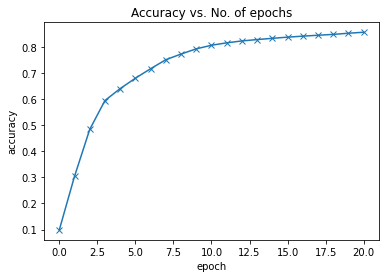

In [10]:
accuracies = [result['val_acc'] for result in epochAccuracy]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');
print(f"{accuracies}")

#### 4. Test model

In [11]:
# Overall test accuracy
result = evaluate(model, testLoader)
print(f"Test accuracy={result['val_acc']}")

Test accuracy=0.8626000285148621


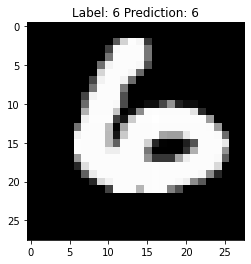

In [ ]:
keyboard = 'n'
while keyboard == 'n':
    clear_output()
    img, label = testData[int(torch.randint(0, len(testData), (1,1)))]
    displayImage(img, label, predict_image(img, model, device))
    keyboard = input("enter n to see next image, or anything else to exit: ")